In [1]:
import pandas as pd # data wrangler library, dataframes are used to display and manipulate data
import seaborn as sns # data graphing library, built on top of matplotlib
import matplotlib.pyplot as plt # graphing library, used for titles and customization
import urllib.parse # library to parse URLs for querying

sns.set_theme()

In [2]:
routes_ace = pd.read_csv("../data/cleaned/routes.csv", index_col=0)
routes_ace.head()

,route,program,implementation_date,Borough
0,B25,ACE,2024-09-30,Brooklyn
1,B26,ACE,2024-09-30,Brooklyn
2,B35,ACE,2024-09-16,Brooklyn
3,B41,ACE,2024-09-16,Brooklyn
4,B42,ACE,2024-09-16,Brooklyn


In [3]:
ridership_api = "https://data.ny.gov/resource/gxb3-akrn.csv"
def encode_soql_query(query:str) -> str:
    # just in case there are any new lines in the query, replaces them with spaces
    while '\n' in query:
        query = query.replace('\n', ' ')
    
    # encodes the query to be URL friendly
    parsed_query = urllib.parse.quote(query)
    
    # return query with prefix needed for soql queries
    return '?$query=' + parsed_query

In [4]:
query = """select
bus_route,
sum(ridership)
group by bus_route
"""

ridership_query = ridership_api + encode_soql_query(query)

In [5]:
ridership_data = pd.read_csv(ridership_query)
ridership_data.head()

,bus_route,sum_ridership
0,B1,3688971
1,B100,1042090
2,B101,0
3,B103,2189025
4,B106,4935


In [6]:
ridership_data['bus_route'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 425 entries, 0 to 424
Series name: bus_route
Non-Null Count  Dtype 
--------------  ----- 
425 non-null    object
dtypes: object(1)
memory usage: 3.4+ KB


In [7]:
ridership_data.sort_values("sum_ridership", ascending=False, inplace=True)
ridership_data.head(10)

,bus_route,sum_ridership
162,M15+,6946109
265,Q58,6140044
41,B6,5428361
230,Q25,5072266
161,M15,4711703
232,Q27,4552032
251,Q44+,4518660
148,M101,4368630
271,Q65,4265020
79,BX12+,4149844


In [8]:
ridership_data.reset_index(inplace=True, drop=True)
ridership_data.head(10)

,bus_route,sum_ridership
0,M15+,6946109
1,Q58,6140044
2,B6,5428361
3,Q25,5072266
4,M15,4711703
5,Q27,4552032
6,Q44+,4518660
7,M101,4368630
8,Q65,4265020
9,BX12+,4149844


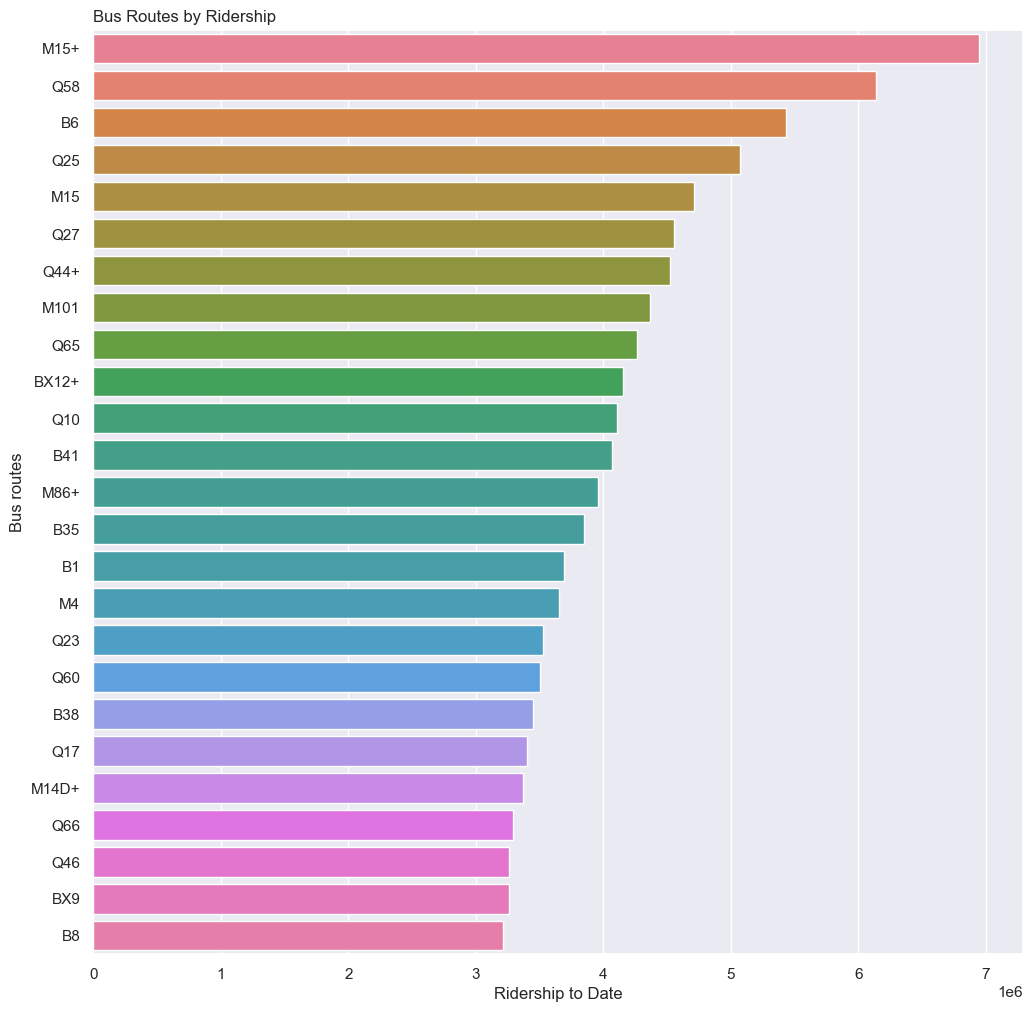

In [9]:
# bar chart of top 25
plt.figure(figsize=(12,12))
sns.barplot(data=ridership_data.head(25), x='sum_ridership', y='bus_route', hue='bus_route')
plt.title("Bus Routes by Ridership", loc='left')
plt.xlabel("Ridership to Date")
plt.ylabel("Bus routes")
plt.show()

In [33]:
ace_routes = pd.read_csv("../data/cleaned/routes.csv", index_col=0)
ace_routes.head()

,route,program,implementation_date,Borough
0,B25,ACE,2024-09-30,Brooklyn
1,B26,ACE,2024-09-30,Brooklyn
2,B35,ACE,2024-09-16,Brooklyn
3,B41,ACE,2024-09-16,Brooklyn
4,B42,ACE,2024-09-16,Brooklyn


In [34]:
ace_routes = pd.merge(ace_routes, ridership_data, how='left', left_on='route', right_on='bus_route')
ace_routes.head()

,route,program,implementation_date,Borough,bus_route,sum_ridership
0,B25,ACE,2024-09-30,Brooklyn,B25,1243833.0
1,B26,ACE,2024-09-30,Brooklyn,B26,1761121.0
2,B35,ACE,2024-09-16,Brooklyn,B35,3846914.0
3,B41,ACE,2024-09-16,Brooklyn,B41,4070468.0
4,B42,ACE,2024-09-16,Brooklyn,B42,369873.0


In [35]:
ace_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   route                43 non-null     object 
 1   program              43 non-null     object 
 2   implementation_date  43 non-null     object 
 3   Borough              43 non-null     object 
 4   bus_route            41 non-null     object 
 5   sum_ridership        41 non-null     float64
dtypes: float64(1), object(5)
memory usage: 2.1+ KB


In [36]:
ace_routes.sort_values(by='sum_ridership', ascending=False, inplace=True)
ace_routes.reset_index(inplace=True, drop=True)
ace_routes.head()

,route,program,implementation_date,Borough,bus_route,sum_ridership
0,M15+,ACE,2024-06-20,Manhattan,M15+,6946109.0
1,Q58,ACE,2024-06-20,Queens,Q58,6140044.0
2,Q44+,ACE,2024-06-20,Queens,Q44+,4518660.0
3,M101,ACE,2024-09-16,Manhattan,M101,4368630.0
4,BX12+,ACE,2024-06-20,Bronx,BX12+,4149844.0


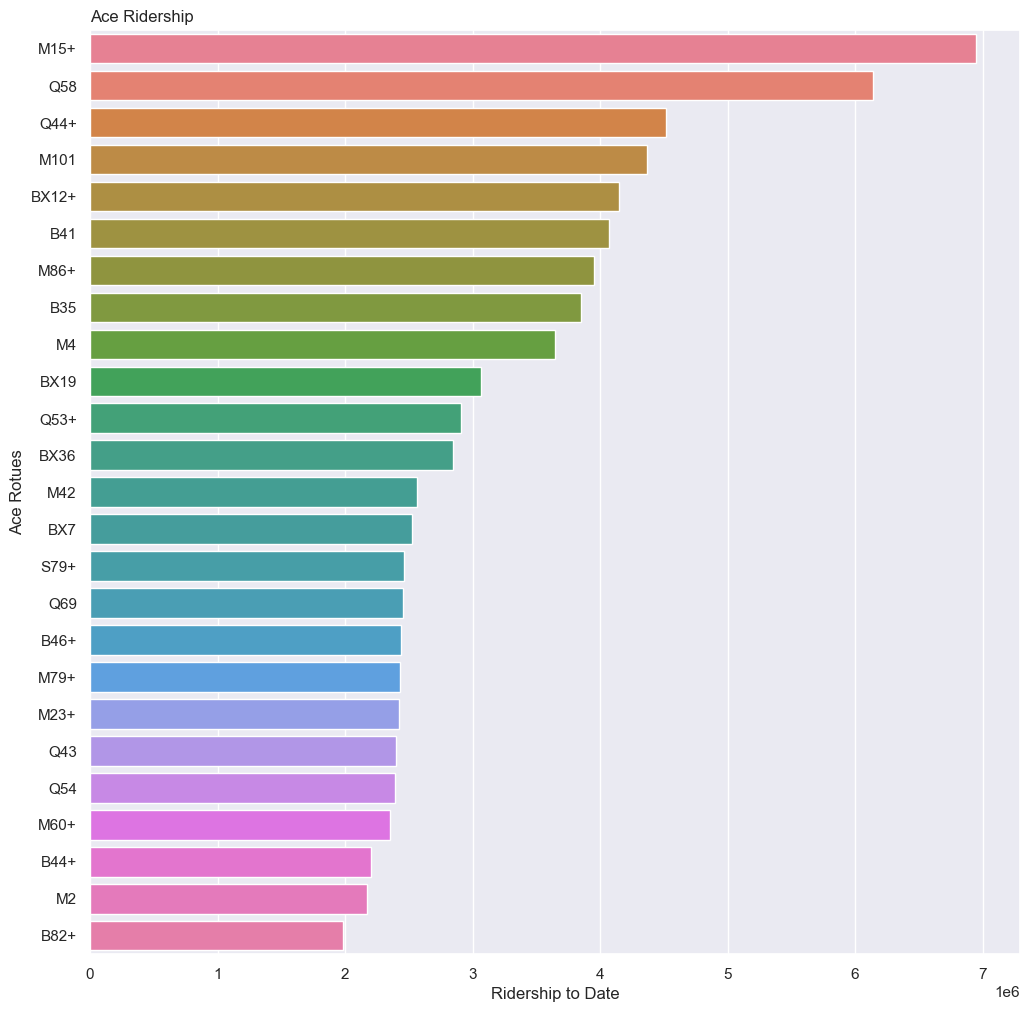

In [45]:
# bar chart of top 25
plt.figure(figsize=(12,12))
ax = sns.barplot(data=ace_routes.head(25), x='sum_ridership', y='route', hue='route')
plt.title("Ace Ridership", loc='left')
plt.xlabel("Ridership to Date")
plt.ylabel("Ace Rotues")
plt.show()

In [53]:
def if_ace(x):
    if x in ace_routes['route'].values:
        return 'Ace Bus'
    else:
        return 'Not Ace Bus'
    


In [54]:
ridership_data['is_ace'] = ridership_data['bus_route'].apply(if_ace)
ridership_data.head()

,bus_route,sum_ridership,is_ace
0,M15+,6946109,Ace Bus
1,Q58,6140044,Ace Bus
2,B6,5428361,Not Ace Bus
3,Q25,5072266,Not Ace Bus
4,M15,4711703,Not Ace Bus


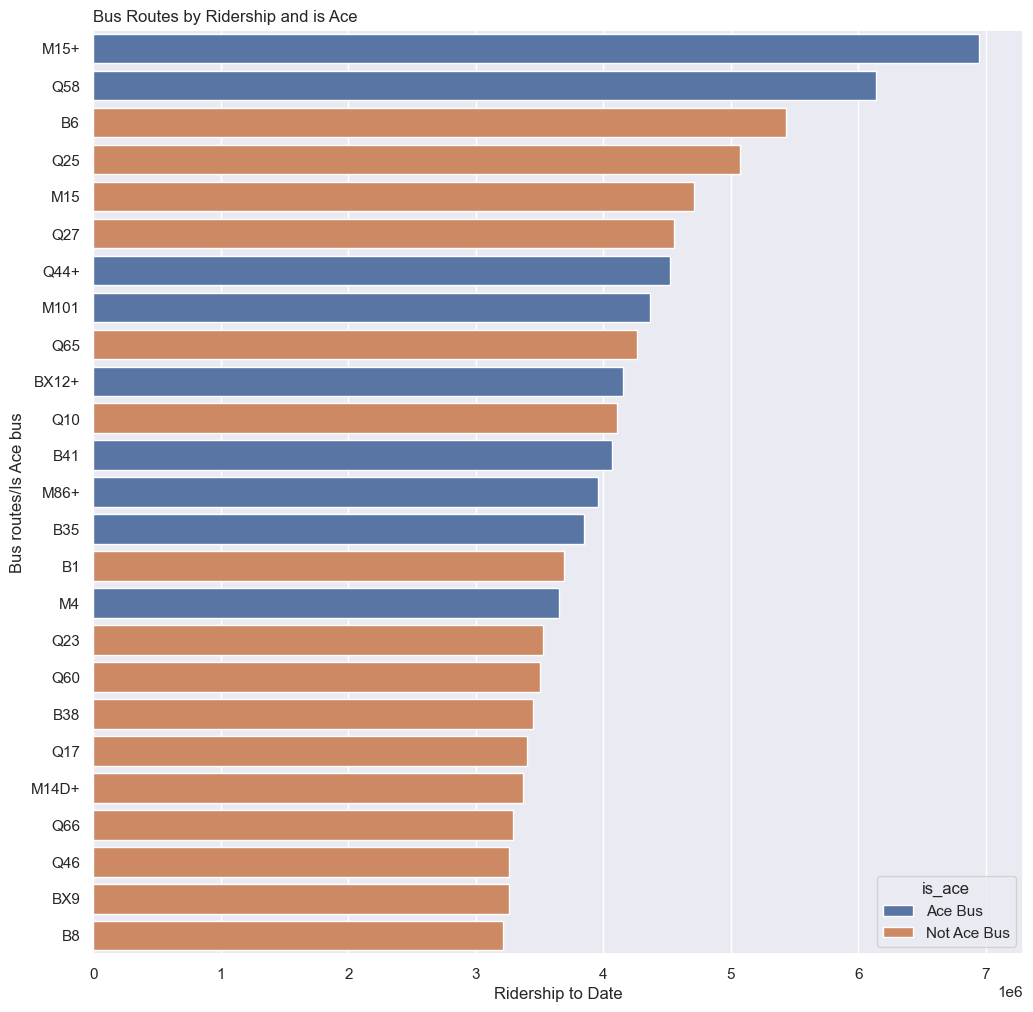

In [55]:
# bar chart of top 25
plt.figure(figsize=(12,12))
sns.barplot(data=ridership_data.head(25), x='sum_ridership', y='bus_route', hue='is_ace')
plt.title("Bus Routes by Ridership and is Ace", loc='left')
plt.xlabel("Ridership to Date")
plt.ylabel("Bus routes/Is Ace bus")
plt.show()